In [1]:
import sys
import os

# Add the project directory to sys.path
project_path = "/Users/hugocontrerasp/Documents/GitHub/moria_ai_labs_dev/data_readiness/"
if project_path not in sys.path:
    sys.path.append(project_path)

In [2]:
# Import the function
from moria_engine.analysis.data_transformers import build_common_fields_matrix_kpis, build_common_fields_matrix_kpis_G, build_common_fields_matrix_schema
from moria_engine.analysis import graph_visualizer,graph_explainer
from moria_engine.data import loaders
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pyvis.network import Network
import networkx as nx

df_kpis = loaders.load_json_kpis('../data/test/c003a_lambengolmor/20250601-hacp-c003_lambengolmor-kpi_details.json')
df_schema = loaders.load_json_schema('../data/test/c003a_lambengolmor/20250601-hacp-c003_lambengolmor-data_domains_schema.json')
df_reports = loaders.load_json_reports('../data/test/c003a_lambengolmor/20250601-hacp-c003_lambengolmor-report_tool_details.json')

In [3]:
df_kpis.head()

,kpi_name,domain_name,table_name,field_name
0,Total Student Enrollment,Student,StudentEnrollment,StudentID
1,Total Student Enrollment,Student,StudentEnrollment,EnrollmentStatus
2,Student Retention Rate,Student,StudentEnrollment,StudentID
3,Student Retention Rate,Student,StudentEnrollment,AcademicTerm
4,Student Retention Rate,Student,StudentEnrollment,EnrollmentStatus


In [4]:
df_schema.head()

,domain_name,table_name,field_name
0,Student,StudentDemographics,StudentID
1,Student,StudentDemographics,FirstName
2,Student,StudentDemographics,LastName
3,Student,StudentDemographics,DateOfBirth
4,Student,StudentDemographics,Gender


In [5]:
df_reports.head()

,report_name,report_description,direct_links,domain_name,table_name,field_name
0,Student Demographics Report,Provides a comprehensive view of student demog...,"[Student Enrollment Report, Student Academic P...",Student,StudentDemographics,StudentID
1,Student Demographics Report,Provides a comprehensive view of student demog...,"[Student Enrollment Report, Student Academic P...",Student,StudentDemographics,FirstName
2,Student Demographics Report,Provides a comprehensive view of student demog...,"[Student Enrollment Report, Student Academic P...",Student,StudentDemographics,LastName
3,Student Demographics Report,Provides a comprehensive view of student demog...,"[Student Enrollment Report, Student Academic P...",Student,StudentDemographics,DateOfBirth
4,Student Demographics Report,Provides a comprehensive view of student demog...,"[Student Enrollment Report, Student Academic P...",Student,StudentDemographics,Gender


In [5]:
M, table_list, d_table_domain, G = build_common_fields_matrix_kpis(df_kpis)

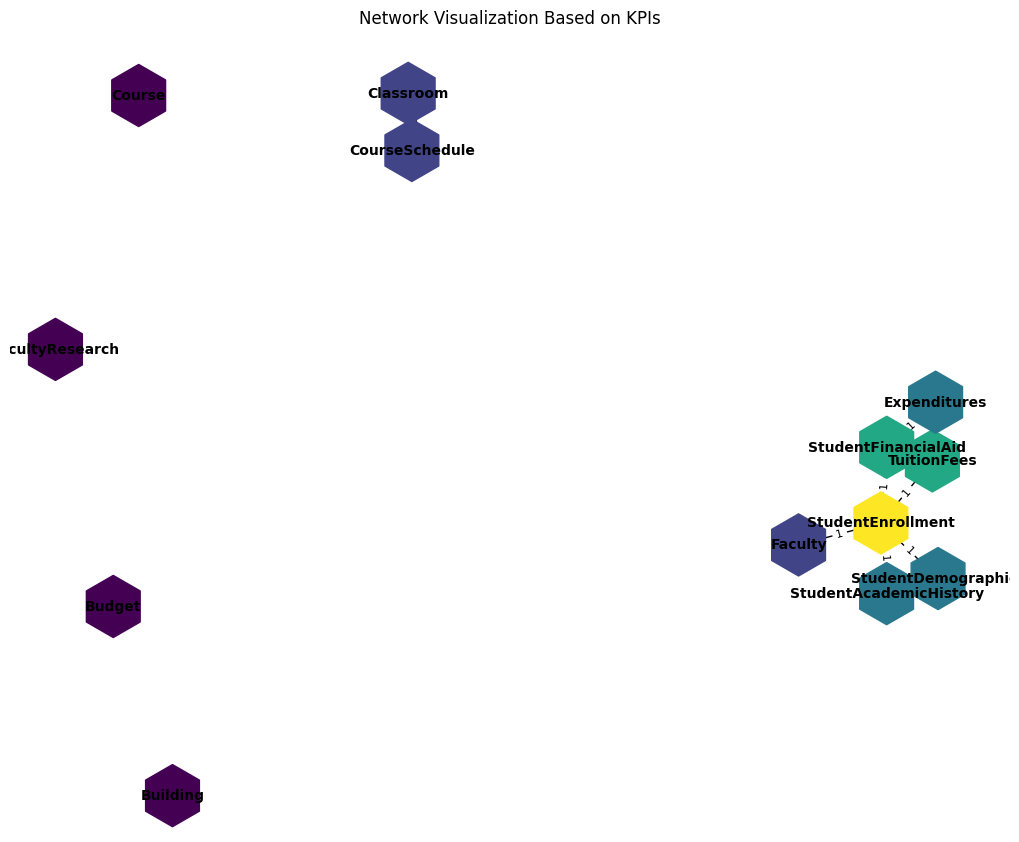

In [6]:
graph_visualizer.visualize_network_kpis(df_kpis)

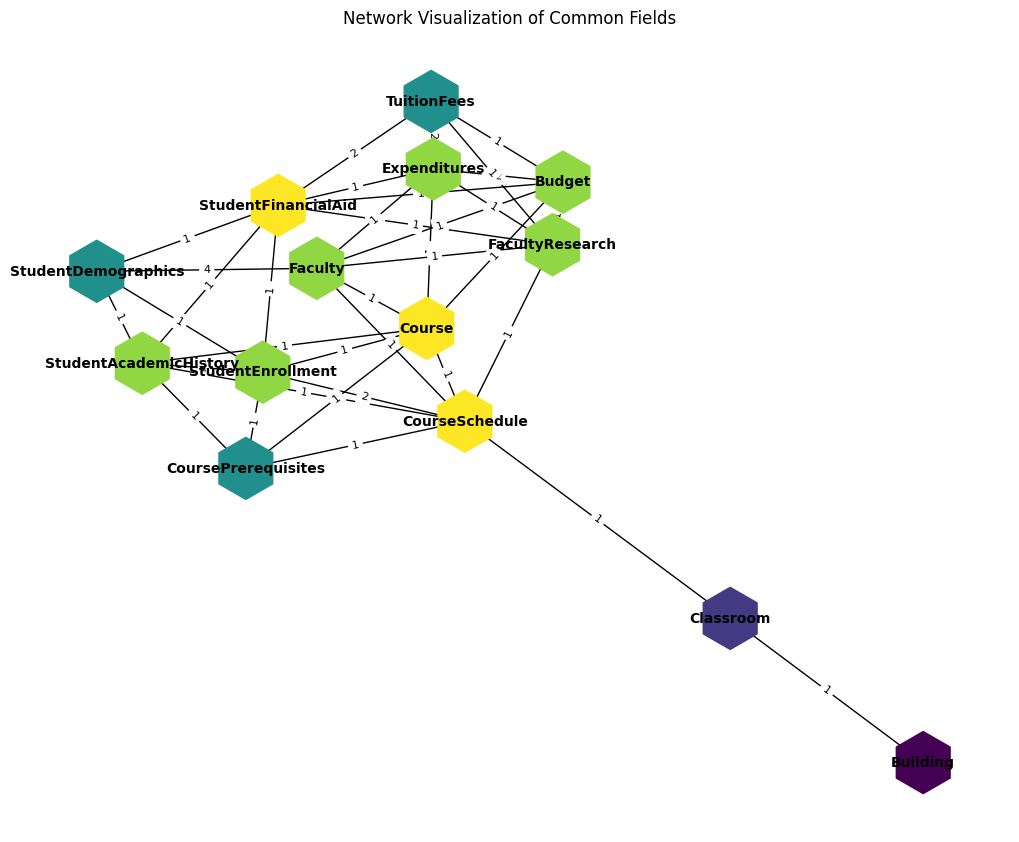

In [7]:
G_schema_v = graph_visualizer.visualize_network_schema(df_schema)

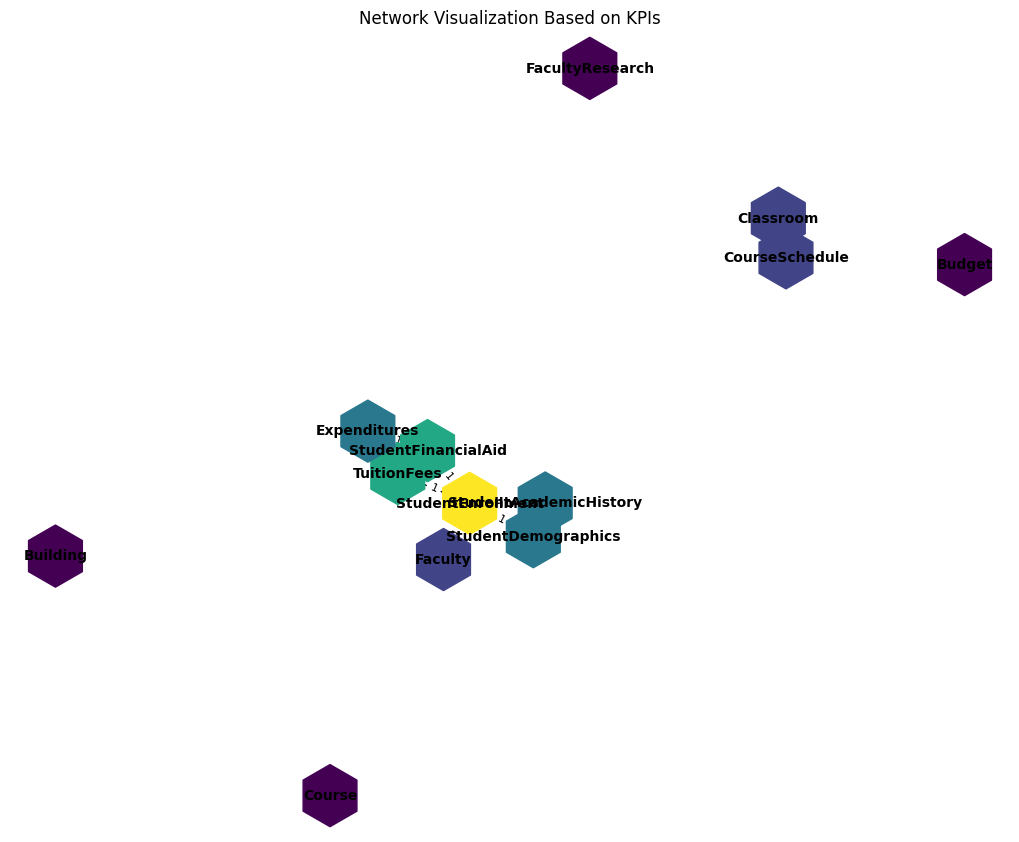

In [8]:
G_kpis_v = graph_visualizer.visualize_network_kpis(df_kpis)

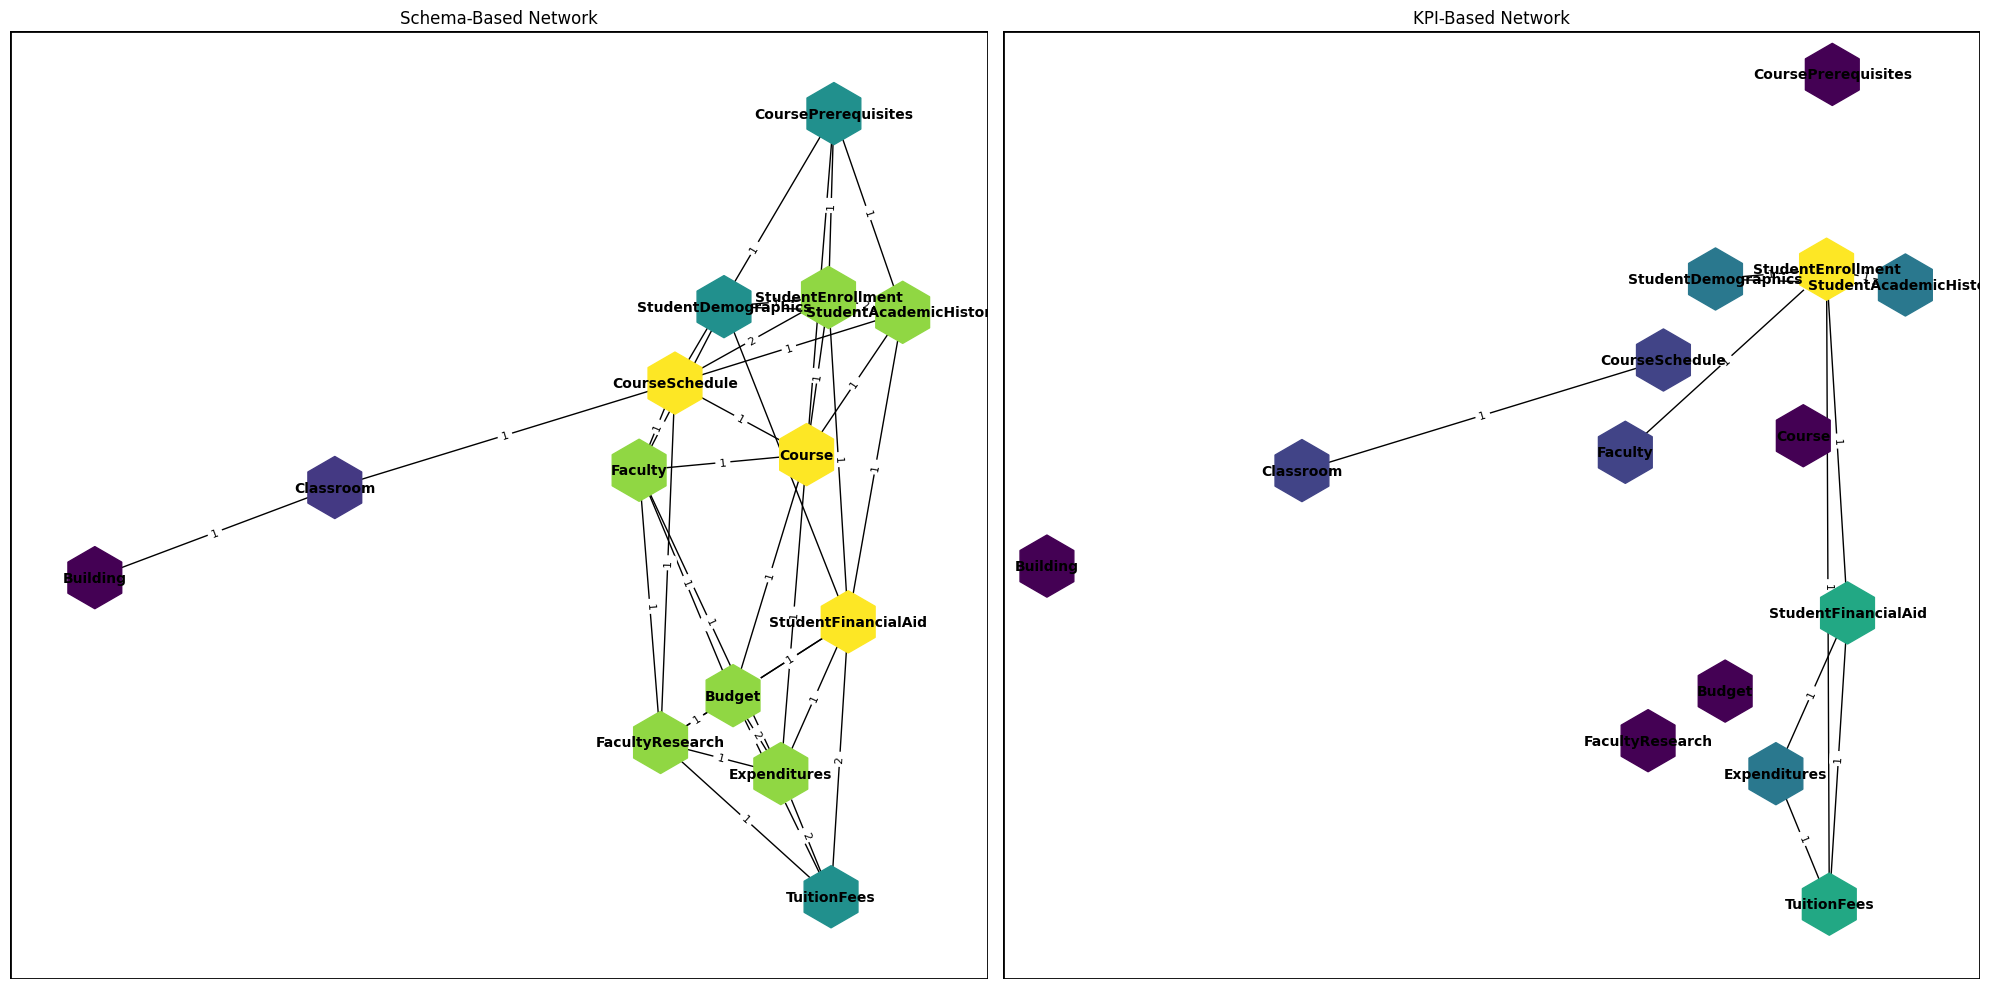

In [9]:
graph_visualizer.visualize_combined_networks1(df_schema, df_kpis)

In [10]:
graph_explainer.graph_centrality_attributes(df_kpis)

,node,domain_name,degree,centrality,betweenness_centrality
0,Budget,Finance,0,0.000000,0.0
1,Building,Facilities,0,0.000000,0.0
2,Classroom,Facilities,1,0.083333,0.0
3,Course,Course,0,0.000000,0.0
4,CourseSchedule,Course,1,0.083333,0.0
5,Expenditures,Finance,1,0.083333,0.0
6,Faculty,Faculty,1,0.083333,0.0
7,FacultyResearch,Faculty,1,0.083333,0.0
8,StudentAcademicHistory,Student,2,0.166667,0.0
9,StudentDemographics,Student,2,0.166667,0.0


In [11]:
graph_explainer.graph_centrality_attributes(df_schema)

,node,domain_name,degree,centrality,betweenness_centrality
0,Budget,Finance,6,0.461538,0.022863
1,Building,Facilities,1,0.076923,0.000000
2,Classroom,Facilities,2,0.153846,0.153846
3,Course,Course,7,0.538462,0.097009
4,CoursePrerequisites,Course,4,0.307692,0.000000
5,CourseSchedule,Course,7,0.538462,0.328419
6,Expenditures,Finance,6,0.461538,0.022863
7,Faculty,Faculty,6,0.461538,0.065171
8,FacultyResearch,Faculty,6,0.461538,0.086966
9,StudentAcademicHistory,Student,6,0.461538,0.048504


In [12]:
df_schema['table_name'].unique()

array(['StudentDemographics', 'StudentEnrollment',
       'StudentAcademicHistory', 'StudentFinancialAid', 'Course',
       'CourseSchedule', 'CoursePrerequisites', 'Faculty',
       'FacultyResearch', 'TuitionFees', 'Budget', 'Expenditures',
       'Classroom', 'Building'], dtype=object)

In [13]:
df_kpis['table_name'].unique()

array(['StudentEnrollment', 'StudentAcademicHistory', 'Faculty',
       'FacultyResearch', 'TuitionFees', 'StudentFinancialAid',
       'Expenditures', 'Classroom', 'CourseSchedule',
       'StudentDemographics', 'Budget', 'Course', 'Building'],
      dtype=object)

In [14]:
matrix_kpis, table_names_kpis, table_to_domain_kpis, table_to_kpi, G_kpis = build_common_fields_matrix_kpis_G(df_kpis)
#M_kpis, table_list_kpis, d_table_domain_kpis, G_kpis = build_common_fields_matrix_kpis(df_kpis)

In [15]:
M_schema, table_list_schema, d_table_domain_schema, G_schema = build_common_fields_matrix_schema(df_schema)

In [16]:
G_kpis

In [17]:
nx.algorithms.graph_edit_distance(G_schema, G_kpis)

27.0

In [18]:
graph_explainer.graph_edit_distance_between_schema_and_kpis(G_schema, G_kpis)

31.0

In [19]:
graph_explainer.graph_edit_distance_between_schema_and_kpis(G_kpis, G_schema)

37.0

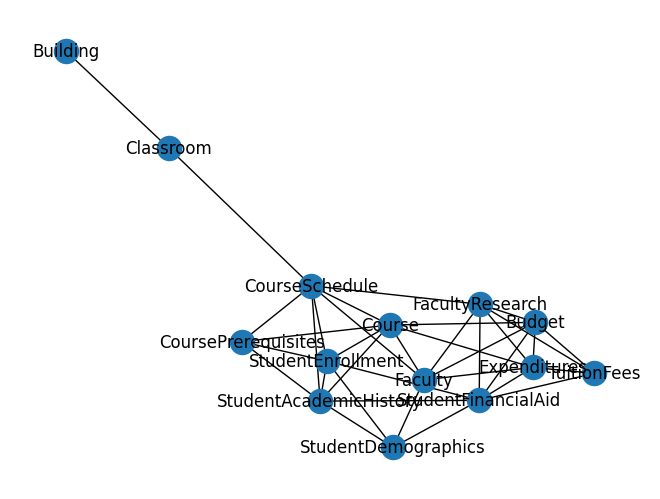

In [20]:
nx.draw(G_schema_v,with_labels=True)

In [21]:
G_schema_v.nodes()

NodeView(('Budget', 'Building', 'Classroom', 'Course', 'CoursePrerequisites', 'CourseSchedule', 'Expenditures', 'Faculty', 'FacultyResearch', 'StudentAcademicHistory', 'StudentDemographics', 'StudentEnrollment', 'StudentFinancialAid', 'TuitionFees'))